**Global Terrorism Database - Data Visualization**

In this kernal, I tried to walk on data visualization with matplotlib and seaborn packages.

**Contents**

1. Load Libraries.
2. Basic Data Cleaning.
3. Basic Data Understanding.
4. Data Visualization - Terrorism around globe.
5. Data Visualization - Terrorism in India.

**1. Load Libraries**

Load libraries that are to be used for data analysis and data visualization.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

**2. Basic Data Cleaning**

Load the dataset with 'ISO-8859-1' encoding. Perform basic data cleaning operations and choode the columns to be worked on. Rename the columns for work convience. Create a column 'casualities', this column is used very often in the below data visualization tasks.

In [14]:
data = pd.read_csv('../input/globalterrorismdb_0617dist.csv', encoding = 'ISO-8859-1')
data
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                     'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                     'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
                     ,inplace=True)
data = data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
             'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities'] = data['Killed']+data['Wounded']

**3.  Understanding the Data**

Reach out the data for some basic answers from the data base. Here, Country and Region with highest terrorist attacks and Country with highest Casualities are caluculated.

In [25]:
print ('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])
print ('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
df = (data.groupby(['Country']).sum())
print ('Country with Highest Casualities:',df.sort_values(by = ['casualities'],ascending=[False]).index[0])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Country with Highest Casualities: Iraq


**4. Data Visualization - Terrorism around globe**

The below plot visualizes the no. of terrorist attacks in every year from 1970 - 2016. It is clear that 2011-2016 are the worst affected years. Let's move on.

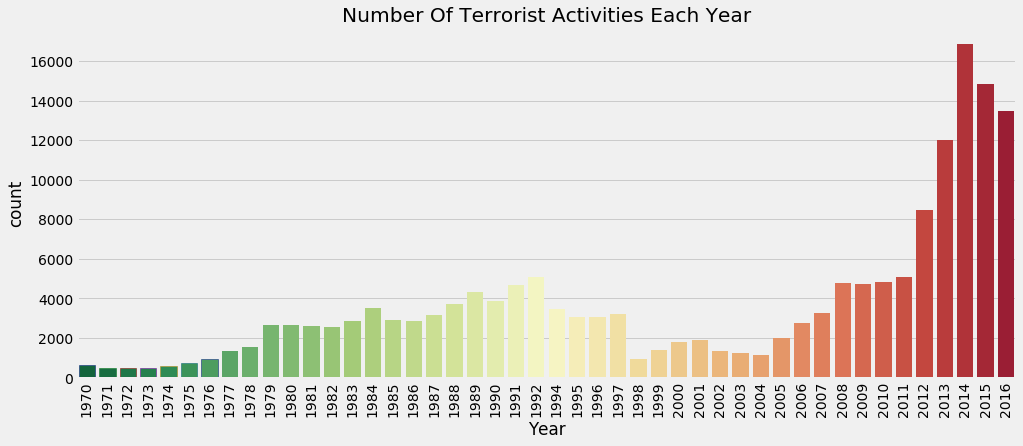

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

* The below plot visualizes the no. of casualities in every year from 1970-2016.
* In the years 2012-2016, on an average 50000 people are victimised in terrorist activities.  2015 is the year with highest number of casualties with toll reaching above 70000.

Year with Highest Number of Casualities :  2015


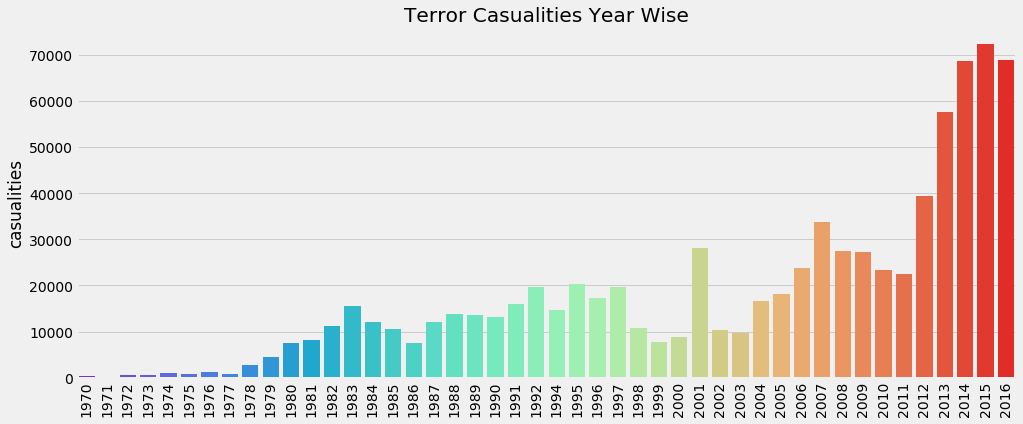

In [17]:
df = (data.groupby(['Year']).sum())
print ("Year with Highest Number of Casualities : ",df.sort_values(by=['casualities'],ascending=[False])
       .index[0])

plt.subplots(figsize=(15,6))
sns.barplot(x = data['Year'].unique(), y = df['casualities'], data= df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Terror Casualities Year Wise')
plt.show()

* Terror Groups with more activity from 1970-2016, Talibans were the most active followed by ISIL.

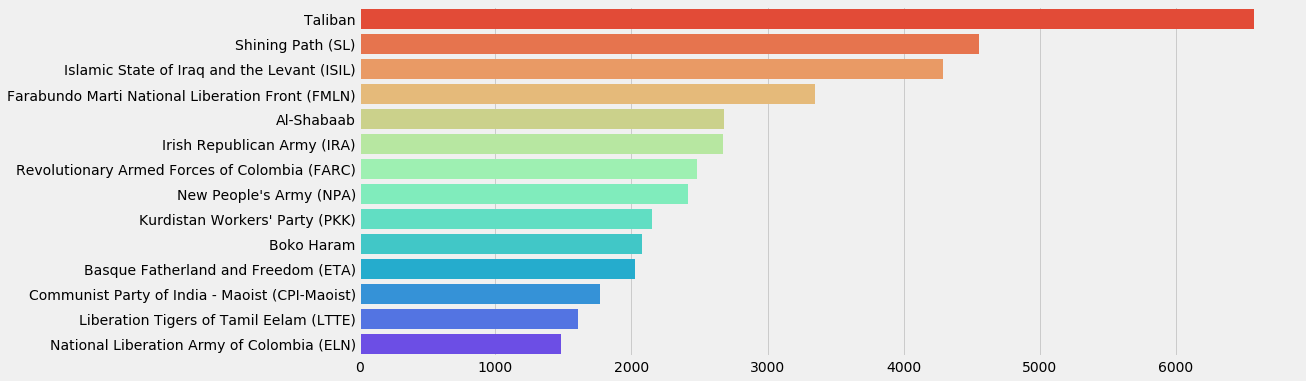

In [18]:
plt.subplots(figsize=(15,6))
sns.barplot(x = data['Group'].value_counts()[1:15].values, y = data['Group'].value_counts()[1:15].index, palette = 'rainbow_r')

* Terror groups ordered by the no. of casualities. ISIL stands first with the number near to 50000 followed by Talibans.

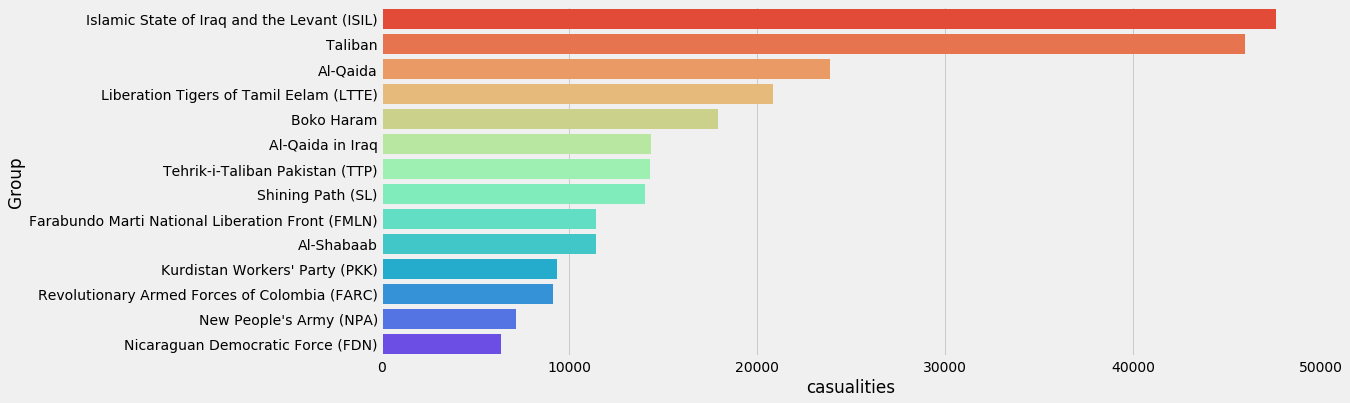

In [19]:
plt.subplots(figsize=(15,6))
data_group = data.groupby(['Group']).sum()
data_group = data_group.sort_values(by = ['casualities'], ascending = False)
sns.barplot (data_group['casualities'][1:15],data_group.index[1:15],palette = 'rainbow_r')

* The methods preferred by terrorists to carry attacks. Bombing was their favourite one and the list goes on...

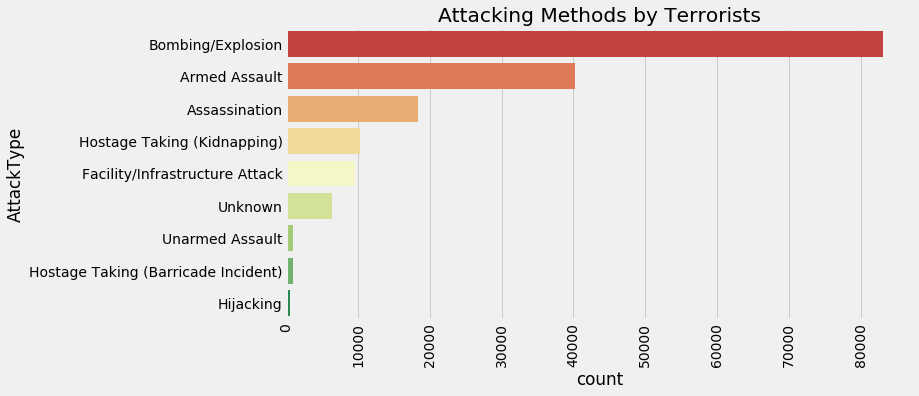

In [20]:
plt.subplots(figsize=(10,5))
sns.countplot(y = 'AttackType',data=data,palette='RdYlGn',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

* Repeated the above plot in India and the Visualizations are provided.

In [21]:
data_india = data[data['Country']=='India']
data_india['casualities'] = data_india['Killed']+data_india['Wounded']

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1185,1972,2,22,India,South Asia,New Delhi,28.632381,77.220004,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives/Bombs/Dynamite,NaN,0.0
2690,1975,1,2,India,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives/Bombs/Dynamite,Unknown,4.0
3782,1976,5,26,India,South Asia,New Delhi,28.632381,77.220004,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives/Bombs/Dynamite,NaN,0.0
5253,1977,9,28,India,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,0.0
7263,1979,1,13,India,South Asia,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,NaN
7268,1979,1,14,India,South Asia,Imphal,24.817011,93.936844,Assassination,3.0,0.0,"Sudhir Kumar Singh, R.K. Sanajoaba Singh, Indr...",NaN,Unknown,Government (General),Firearms,NaN,3.0
8100,1979,4,26,India,South Asia,Unknown,24.663717,93.906269,Armed Assault,4.0,0.0,Indian security force in front of jeep,NaN,Meitei extremists,Police,Firearms,NaN,4.0
8611,1979,6,14,India,South Asia,Unknown,23.164543,92.937574,Assassination,1.0,0.0,Government Official,NaN,Mizo National Front,Government (General),Firearms,NaN,1.0
8757,1979,7,1,India,South Asia,Unknown,26.200604,92.937574,Armed Assault,2.0,2.0,Magistrates house,NaN,Mizo National Front,Government (General),Firearms,NaN,4.0
8762,1979,7,2,India,South Asia,Aizawl,23.727107,92.717639,Facility/Infrastructure Attack,NaN,NaN,complex,NaN,Mizo National Front,Police,Unknown,NaN,NaN


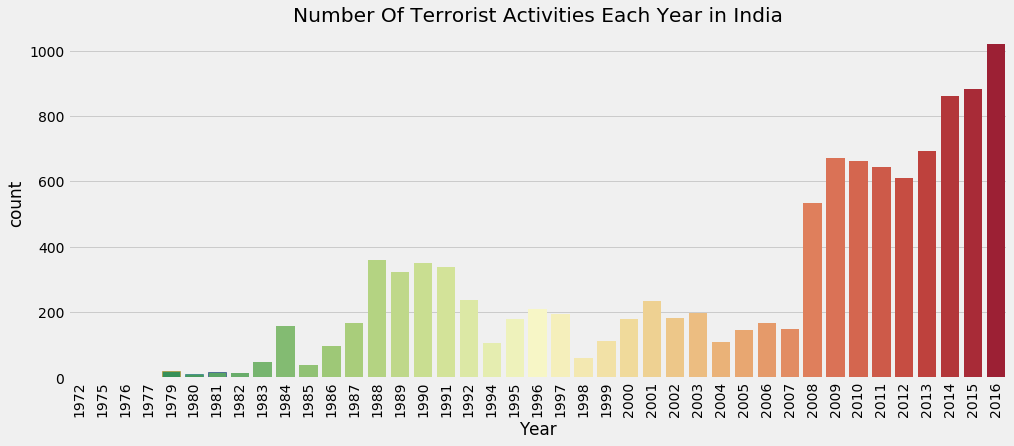

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data_india,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in India')
plt.show()

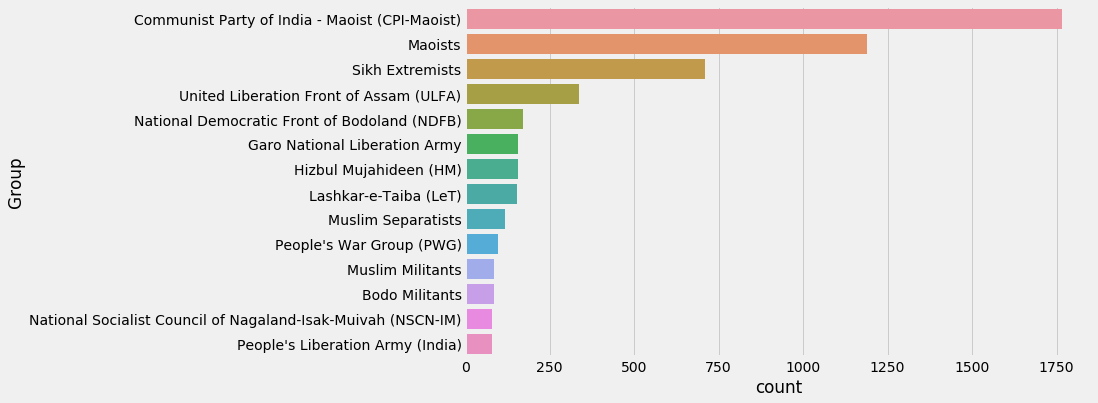

In [23]:
plt.subplots(figsize=(10,6))
ind_groups=data_india['Group'].value_counts()[1:15].index
ind_groups=data_india[data_india['Group'].isin(ind_groups)]
sns.countplot(y='Group', data=ind_groups, order = ind_groups['Group'].value_counts().index)
# plt.xticks(rotation=90)

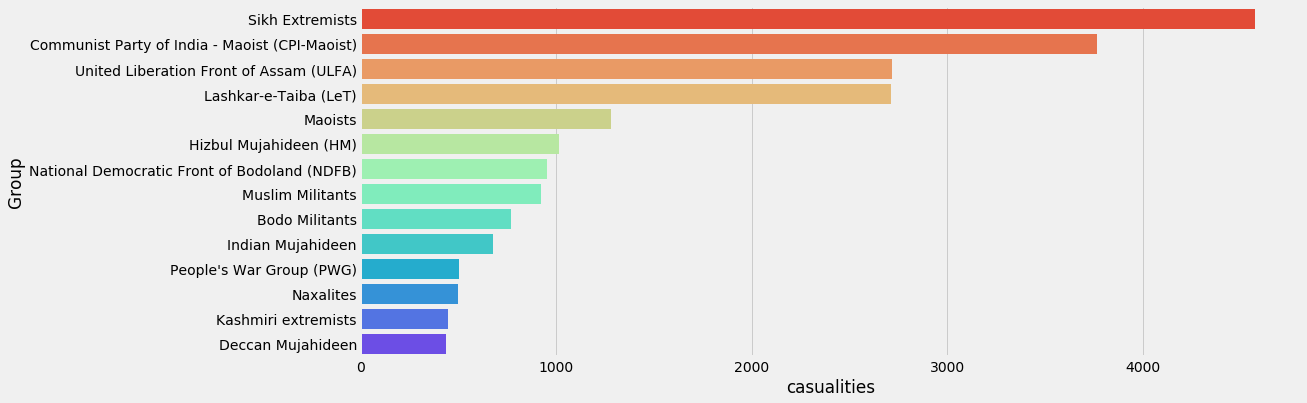

In [24]:
plt.subplots(figsize=(15,6))
data_india_group = data_india.groupby(['Group']).sum()
data_india_group = data_india_group.sort_values(by = ['casualities'], ascending = False)
sns.barplot (data_india_group['casualities'][1:15],data_india_group.index[1:15],palette = 'rainbow_r')